# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [74]:
# Import your libraries:

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sqlalchemy import create_engine
import seaborn as sns

# Challenge 0 - Import a MySQL table into python:

In this lab, we will twist things up a little. Do you remember your good old friend SQL?
Well, it's time to bring him back and use it in our lab pipeline.

1º- Open the wholesale_customers_data.sql file in MySQL Workbench and run the script into a desired schema.

2º- Create a connection using sqlalchemy from python to mysql and load the table into a variable called *customers*

In [75]:
import getpass
saved_password = getpass.getpass()

········


In [76]:
user = 'root'
password = saved_password
host = 'localhost'
port = 3306
database = 'lab_w21d3'

In [77]:
from sqlalchemy import create_engine

engine = create_engine(url="mysql+pymysql://{0}:{1}@{2}:{3}/{4}".format(
            user, password, host, port, database
        ))

In [78]:
cnx = engine.connect()

In [79]:
customers = pd.read_sql_table('wholesale_customers_data',cnx)
customers

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


# Challenge 1 - Describe the Dataset

Your already loaded dataset contains information about customer preferences. We will look at how much each customer spends in a year on each subcategory in the grocery store and try to find similarities using clustering.

In case of curiosity, the origin of the dataset is [here](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

#### Explore the dataset with mathematical and visualization techniques. What do you find?

Checklist:

* What does each column mean?
* Any categorical data to convert?
* Any missing data to remove?
* Column collinearity - any high correlations?
* Descriptive statistics - any outliers to remove?
* Column-wise data distribution - is the distribution skewed?
* Etc.

Additional info: Over a century ago, an Italian economist named Vilfredo Pareto discovered that roughly 20% of the customers account for 80% of the typical retail sales. This is called the [Pareto principle](https://en.wikipedia.org/wiki/Pareto_principle). Check if this dataset displays this characteristic.

In [80]:
"""
1) FRESH: annual spending (m.u.) on fresh products (Continuous);
2) MILK: annual spending (m.u.) on milk products (Continuous);
3) GROCERY: annual spending (m.u.)on grocery products (Continuous);
4) FROZEN: annual spending (m.u.)on frozen products (Continuous)
5) DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous)
6) DELICATESSEN: annual spending (m.u.)on and delicatessen products (Continuous);
7) CHANNEL: customersâ€™ Channel - Horeca (Hotel/Restaurant/CafÃ©) or Retail channel (Nominal)
8) REGION: customersâ€™ Region â€“ Lisnon, Oporto or Other (Nominal)
"""

'\n1) FRESH: annual spending (m.u.) on fresh products (Continuous);\n2) MILK: annual spending (m.u.) on milk products (Continuous);\n3) GROCERY: annual spending (m.u.)on grocery products (Continuous);\n4) FROZEN: annual spending (m.u.)on frozen products (Continuous)\n5) DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous)\n6) DELICATESSEN: annual spending (m.u.)on and delicatessen products (Continuous);\n7) CHANNEL: customersâ€™ Channel - Horeca (Hotel/Restaurant/CafÃ©) or Retail channel (Nominal)\n8) REGION: customersâ€™ Region â€“ Lisnon, Oporto or Other (Nominal)\n'

In [81]:
customers.dtypes

Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object

In [82]:
customers.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [83]:
customers.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

<AxesSubplot:>

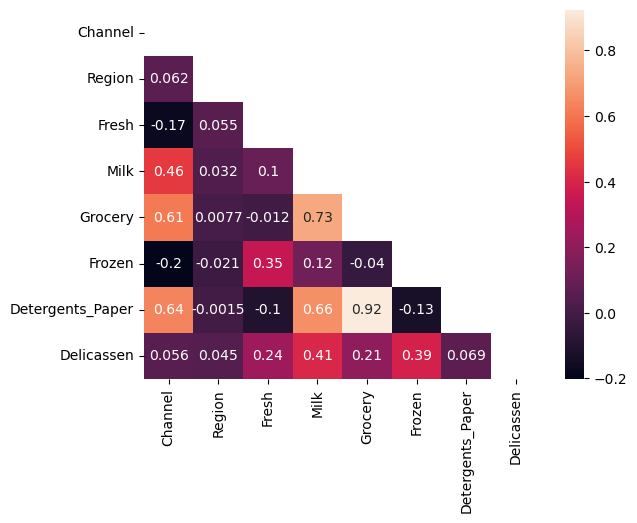

In [84]:
# Your plots here
corr= customers.corr()

# Getting the Upper Triangle of the co-relation matrix
matrix = np.triu(corr)

# using the upper triangle matrix as mask 
sns.heatmap(corr, annot=True, mask=matrix)

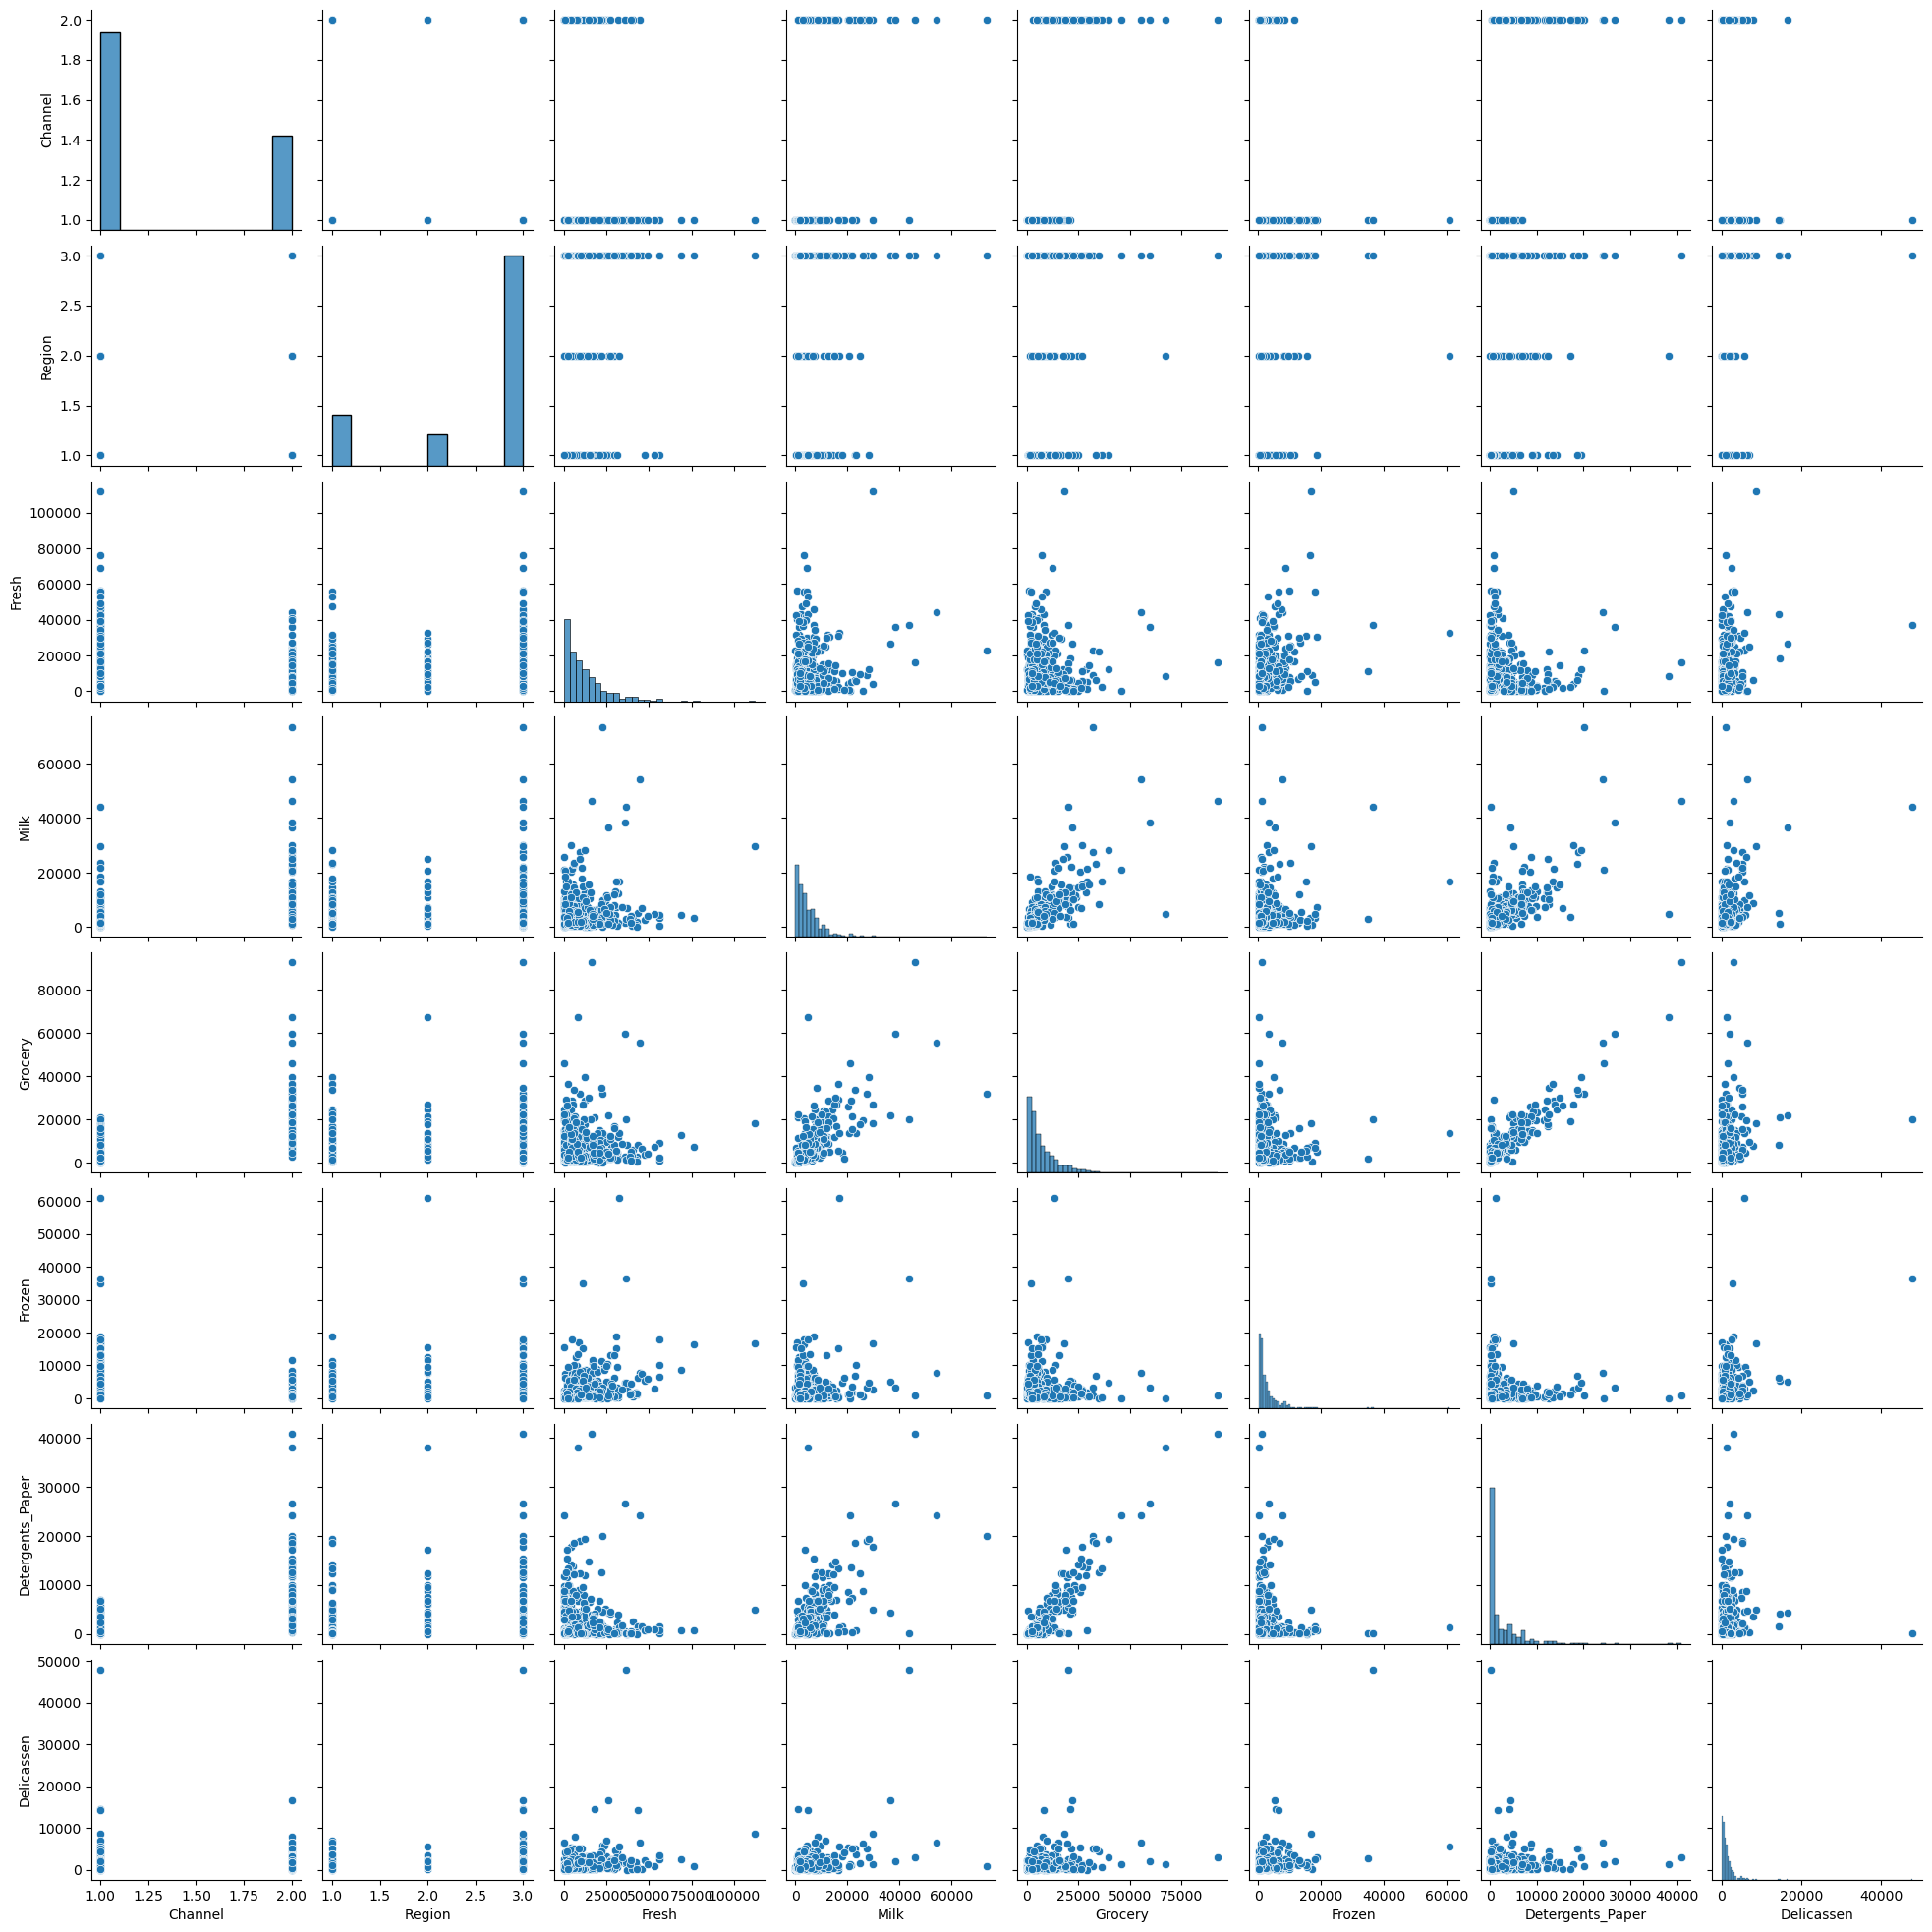

In [85]:
sns.pairplot(customers)

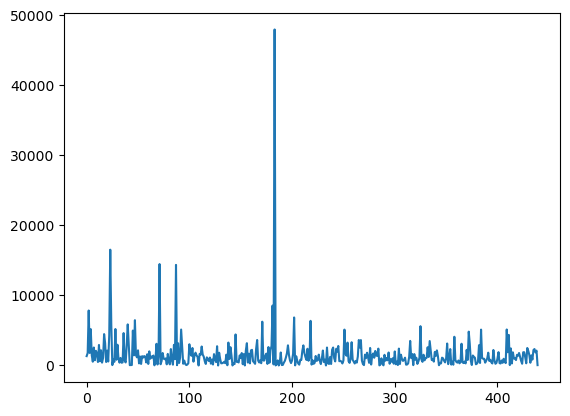

In [86]:
plt.plot(customers['Delicassen'])

In [87]:
customers['Delicassen'].sort_values(ascending=False)

183    47943
23     16523
71     14472
87     14351
181     8550
       ...  
233        7
109        3
128        3
142        3
187        3
Name: Delicassen, Length: 440, dtype: int64

In [88]:
# We have an outlier in Delicatessen column.

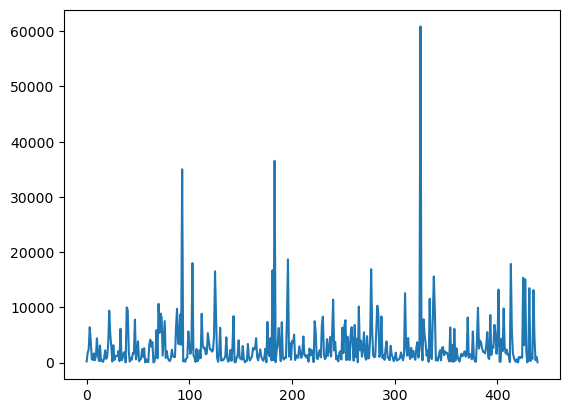

In [89]:
plt.plot(customers['Frozen'])

In [90]:
customers.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [91]:
# Pareto Analysis

In [92]:
# Let's calculate the total sales for each customer
customers_pareto = pd.DataFrame(customers['Fresh']+customers['Milk']+customers['Grocery']+customers['Frozen']+customers['Detergents_Paper']+customers['Delicassen']).reset_index()
customers_pareto.head()

,index,0
0,0,34112
1,1,33266
2,2,36610
3,3,27381
4,4,46100


In [93]:
customers_pareto=customers_pareto.sort_values(by=0, ascending=False)
customers_pareto.head()

,index,0
85,85,199891
47,47,192714
181,181,190169
183,183,185683
61,61,165881


In [94]:
#20% of 440 = 88. Let's sum the sales for this top 20% clients

In [95]:
customers_pareto20 = customers_pareto.head(88)
customers_pareto20.sum()

index      16685
0        6272473
dtype: int64

In [96]:
#Sum for all of the clients
customers_pareto.sum()

index       96580
0        14619500
dtype: int64

In [97]:
(customers_pareto20.sum()[0]/customers_pareto.sum()[0])*100

42.90483942679298

In [98]:
#No, 20% of the clients, generate 42.9% of the total sales.

In [99]:
440*0.4

176.0

In [100]:
customers_pareto40 = customers_pareto.head(176)
customers_pareto40.sum()

index      36508
0        9584138
dtype: int64

In [101]:
(customers_pareto40.sum()[0]/customers_pareto.sum()[0])*100

65.55722151920381

In [102]:
440*0.6

264.0

In [103]:
customers_pareto60 = customers_pareto.head(264)
customers_pareto60.sum()

index       55074
0        12004604
dtype: int64

In [104]:
(customers_pareto60.sum()[0]/customers_pareto.sum()[0])*100

82.11364273743972

In [105]:
#In this case, 60% of customers account the 8'% of the sales.

# Challenge 2 - Data Cleaning and Transformation

If your conclusion from the previous challenge is the data need cleaning/transformation, do it in the cells below. However, if your conclusion is the data need not be cleaned or transformed, feel free to skip this challenge. But if you do choose the latter, please provide rationale.

In [106]:
customers.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [107]:
# I'm only going to dummify Channel and Region. (I see we'll normalize data in the next step)

In [108]:
customers = pd.get_dummies(customers, columns=(['Channel','Region']), drop_first=True)
customers.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel_2,Region_2,Region_3
0,12669,9656,7561,214,2674,1338,1,0,1
1,7057,9810,9568,1762,3293,1776,1,0,1
2,6353,8808,7684,2405,3516,7844,1,0,1
3,13265,1196,4221,6404,507,1788,0,0,1
4,22615,5410,7198,3915,1777,5185,1,0,1


# Challenge 3 - Data Preprocessing

One problem with the dataset is the value ranges are remarkably different across various categories (e.g. `Fresh` and `Grocery` compared to `Detergents_Paper` and `Delicassen`). If you made this observation in the first challenge, you've done a great job! This means you not only completed the bonus questions in the previous Supervised Learning lab but also researched deep into [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). Keep on the good work!

Diverse value ranges in different features could cause issues in our clustering. The way to reduce the problem is through feature scaling. We'll use this technique again with this dataset.

#### We will use the `StandardScaler` from `sklearn.preprocessing` and scale our data. Read more about `StandardScaler` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*After scaling your data, assign the transformed data to a new variable `customers_scale`.*

In [109]:
# Your import here:

from sklearn.preprocessing import StandardScaler

# Your code here:
customers_scale=customers.copy()
StandardScaler().fit_transform(customers[['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']])

customers_scale[['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']]=pd.DataFrame(StandardScaler().fit_transform(customers[['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']]),columns=['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen'])

C:\Users\AAndres\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['quoted_name']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\AAndres\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['quoted_name']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\AAndres\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['quoted_name']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\AAndres\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['quoted_name']. An error will be raised in 1.2.
  warnings.warn(


In [110]:
customers_scale.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel_2,Region_2,Region_3
0,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339,1,0,1
1,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151,1,0,1
2,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293,1,0,1
3,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411,0,0,1
4,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347,1,0,1


# Challenge 4 - Data Clustering with K-Means

Now let's cluster the data with K-Means first. Initiate the K-Means model, then fit your scaled data. In the data returned from the `.fit` method, there is an attribute called `labels_` which is the cluster number assigned to each data record. What you can do is to assign these labels back to `customers` in a new column called `customers['labels']`. Then you'll see the cluster results of the original data.

In [148]:
# Your code here:
from sklearn.cluster import KMeans
from sklearn import cluster, datasets
kmeans = cluster.KMeans()
customers['labels']= kmeans.fit(customers_scale).labels_

C:\Users\AAndres\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['quoted_name', 'str']. An error will be raised in 1.2.
  warnings.warn(


Count the values in `labels`.

In [149]:
customers['labels'].value_counts()

0    185
1    103
7     67
5     40
2     32
6      7
4      5
3      1
Name: labels, dtype: int64

# Challenge 5 - Data Clustering with DBSCAN

Now let's cluster the data using DBSCAN. Use `DBSCAN(eps=0.5)` to initiate the model, then fit your scaled data. In the data returned from the `.fit` method, assign the `labels_` back to `customers['labels_DBSCAN']`. Now your original data have two labels, one from K-Means and the other from DBSCAN.

In [150]:
# Your code here
from sklearn.cluster import DBSCAN
dbscan = cluster.DBSCAN(eps=0.5)
customers['labels_DBSCAN']= dbscan.fit(customers_scale).labels_

C:\Users\AAndres\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['quoted_name', 'str']. An error will be raised in 1.2.
  warnings.warn(


Count the values in `labels_DBSCAN`.

In [151]:
# Your code here
customers['labels_DBSCAN'].value_counts()

-1    255
 1    130
 5     22
 4      7
 6      6
 0      5
 3      5
 2      5
 7      5
Name: labels_DBSCAN, dtype: int64

# Challenge 6 - Compare K-Means with DBSCAN

Now we want to visually compare how K-Means and DBSCAN have clustered our data. We will create scatter plots for several columns. For each of the following column pairs, plot a scatter plot using `labels` and another using `labels_DBSCAN`. Put them side by side to compare. Which clustering algorithm makes better sense?

Columns to visualize:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualize `Detergents_Paper` as X and `Milk` as y by `labels` and `labels_DBSCAN` respectively

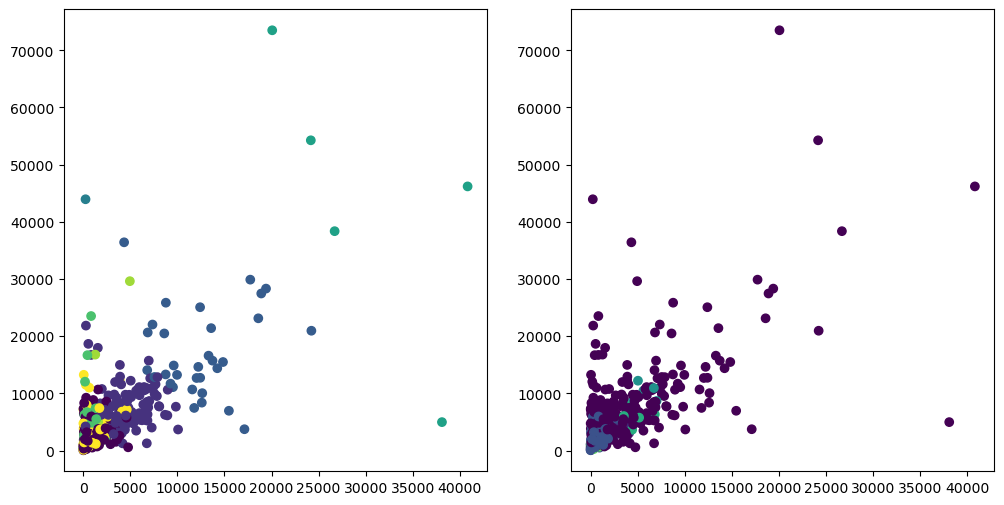

In [152]:
# Your code here:
options, charts = plt.subplots(1, 2, figsize=(12, 6))
charts[0].scatter(customers['Detergents_Paper'], customers['Milk'],c=customers['labels'])
charts[1].scatter(customers['Detergents_Paper'], customers['Milk'],c=customers['labels_DBSCAN'])

Visualize `Grocery` as X and `Fresh` as y by `labels` and `labels_DBSCAN` respectively

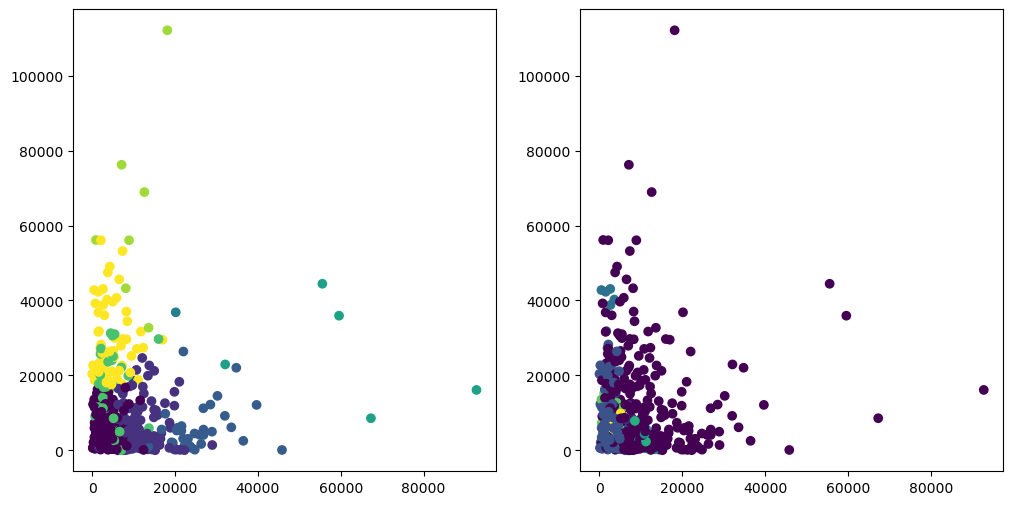

In [153]:
# Your code here:
options, charts = plt.subplots(1, 2, figsize=(12, 6))
charts[0].scatter(customers['Grocery'], customers['Fresh'],c=customers['labels'])
charts[1].scatter(customers['Grocery'], customers['Fresh'],c=customers['labels_DBSCAN'])

Visualize `Frozen` as X and `Delicassen` as y by `labels` and `labels_DBSCAN` respectively

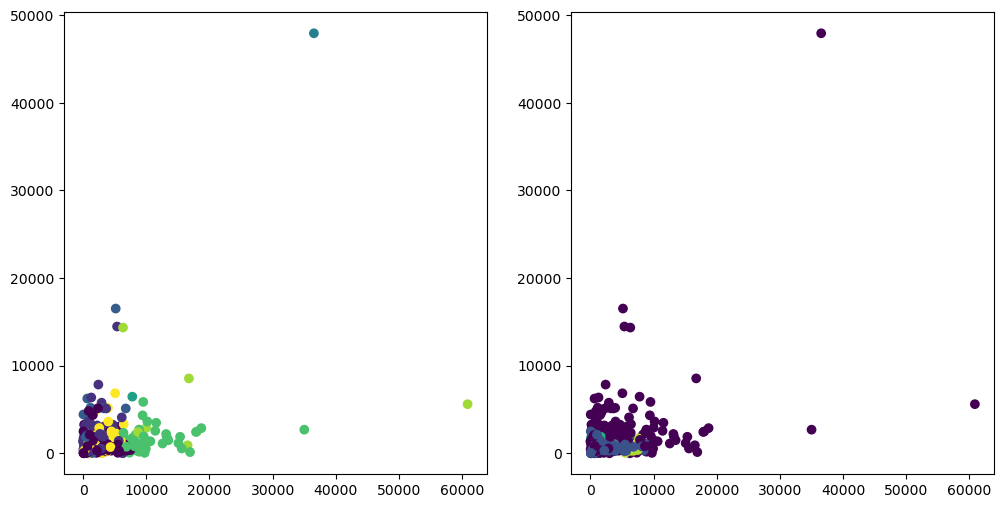

In [154]:
# Your code here:
options, charts = plt.subplots(1, 2, figsize=(12, 6))
charts[0].scatter(customers['Frozen'], customers['Delicassen'],c=customers['labels'])
charts[1].scatter(customers['Frozen'], customers['Delicassen'],c=customers['labels_DBSCAN'])

Let's use a groupby to see how the mean differs between the groups. Group `customers` by `labels` and `labels_DBSCAN` respectively and compute the means for all columns.

In [155]:
# Your code here:
customers.groupby(['labels']).agg('mean')

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel_2,Region_2,Region_3,labels_DBSCAN
labels,,,,,,,,,,
0,6754.313514,2473.410811,3092.200000,1871.108108,704.281081,862.740541,0.016216,0.097297,0.697297,1.167568
1,6886.718447,7933.368932,12062.252427,1425.436893,4875.067961,1637.067961,0.873786,0.077670,0.805825,-0.417476
2,6064.531250,16952.187500,25621.562500,1822.718750,12381.437500,2420.375000,1.000000,0.218750,0.562500,-1.000000
3,36847.000000,43950.000000,20170.000000,36534.000000,239.000000,47943.000000,0.000000,0.000000,1.000000,-1.000000
4,25603.000000,43460.600000,61472.200000,2636.000000,29974.200000,2708.800000,1.000000,0.200000,0.800000,-1.000000
5,15705.150000,4293.300000,4211.950000,11054.800000,550.250000,1639.875000,0.075000,0.150000,0.725000,-0.475000
6,63651.714286,9054.142857,9915.714286,19598.000000,1574.285714,5321.142857,0.000000,0.142857,0.857143,-1.000000
7,28187.402985,3534.402985,4459.462687,2556.059701,837.119403,1506.507463,0.134328,0.089552,0.686567,0.000000


In [156]:
customers.groupby(['labels_DBSCAN']).agg('mean')

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel_2,Region_2,Region_3,labels
labels_DBSCAN,,,,,,,,,,
-1,13729.564706,8359.886275,11484.364706,3795.003922,4356.800000,2080.470588,0.490196,0.164706,0.643137,2.623529
0,11401.000000,3536.200000,6729.000000,720.200000,3561.000000,258.200000,1.000000,0.000000,1.000000,1.000000
1,9128.823077,1862.438462,2423.530769,2131.430769,496.576923,741.946154,0.000000,0.000000,1.000000,1.184615
2,41446.600000,1421.200000,2167.600000,1276.400000,416.200000,784.800000,0.000000,0.000000,1.000000,7.000000
3,2357.200000,10224.800000,11862.800000,609.600000,5780.000000,572.800000,1.000000,0.000000,1.000000,1.000000
4,3068.142857,6095.857143,10355.000000,994.000000,4675.571429,1826.428571,1.000000,0.000000,1.000000,1.000000
5,9837.863636,1751.863636,2161.681818,1513.181818,333.954545,669.045455,0.000000,0.000000,0.000000,0.954545
6,6823.000000,1943.000000,2372.666667,6780.333333,386.500000,613.666667,0.000000,0.000000,0.000000,0.833333
7,7494.600000,1537.600000,3383.000000,2575.400000,227.400000,941.000000,0.000000,1.000000,0.000000,0.000000


Which algorithm appears to perform better?

In [ ]:
# K-Means seems to perform better

# Bonus Challenge 1 - Changing K-Means Number of Clusters

As we mentioned earlier, we don't need to worry about the number of clusters with DBSCAN because it automatically decides that based on the parameters we send to it. But with K-Means, we have to supply the `n_clusters` param (if you don't supply `n_clusters`, the algorithm will use `8` by default). You need to know that the optimal number of clusters differs case by case based on the dataset. K-Means can perform badly if the wrong number of clusters is used.

In advanced machine learning, data scientists try different numbers of clusters and evaluate the results with statistical measures (read [here](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). We are not using statistical measures today but we'll use our eyes instead. In the cells below, experiment with different number of clusters and visualize with scatter plots. What number of clusters seems to work best for K-Means?

In [157]:
from sklearn.cluster import KMeans
from sklearn import cluster, datasets
kmeans = cluster.KMeans(n_clusters=4)
customers['labels']= kmeans.fit(customers_scale).labels_
customers['labels'].value_counts()

C:\Users\AAndres\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['quoted_name', 'str']. An error will be raised in 1.2.
  warnings.warn(


1    306
0    121
2     12
3      1
Name: labels, dtype: int64

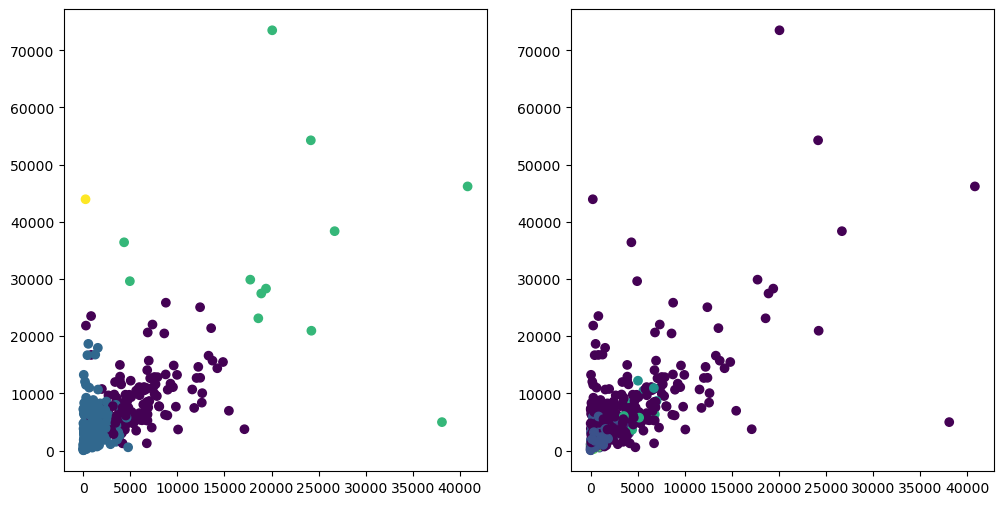

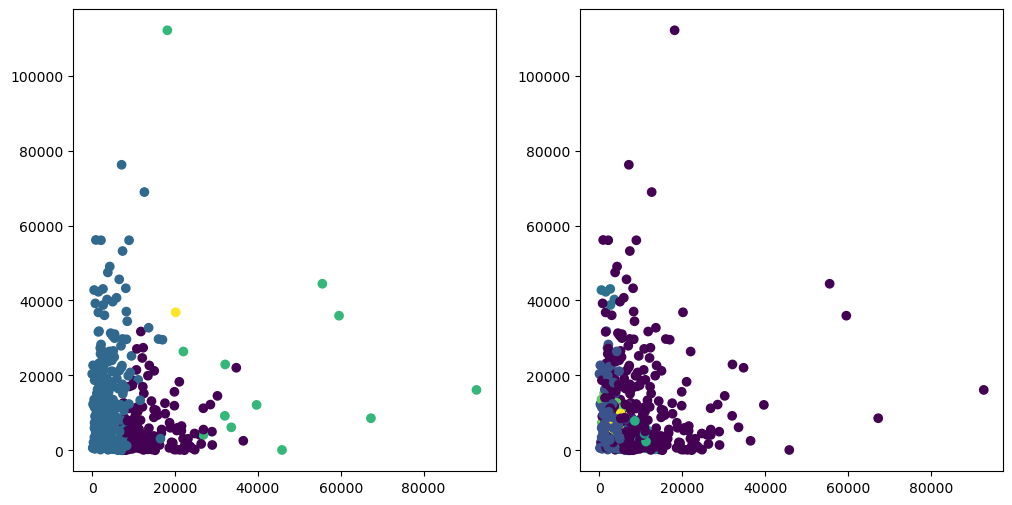

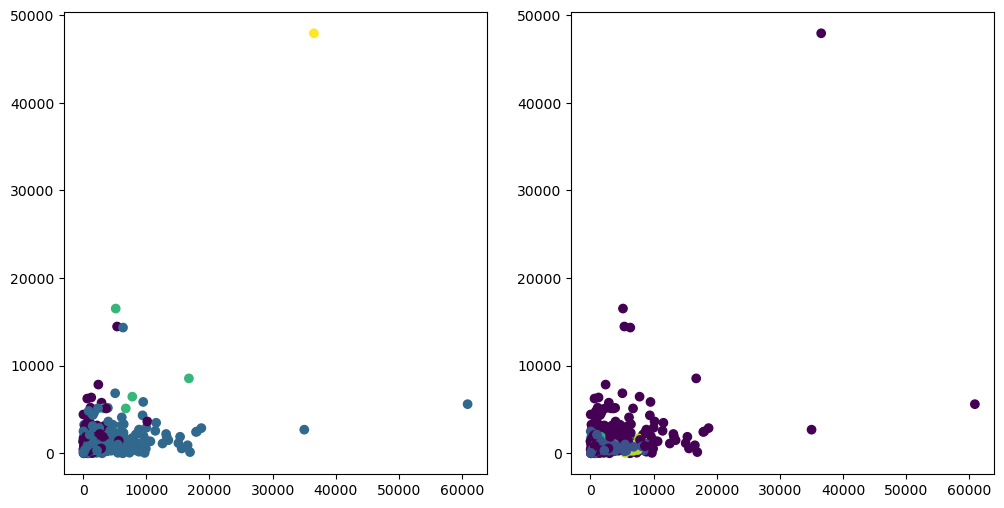

In [159]:
options, charts = plt.subplots(1, 2, figsize=(12, 6))
charts[0].scatter(customers['Detergents_Paper'], customers['Milk'],c=customers['labels'])
charts[1].scatter(customers['Detergents_Paper'], customers['Milk'],c=customers['labels_DBSCAN'])

options, charts = plt.subplots(1, 2, figsize=(12, 6))
charts[0].scatter(customers['Grocery'], customers['Fresh'],c=customers['labels'])
charts[1].scatter(customers['Grocery'], customers['Fresh'],c=customers['labels_DBSCAN'])

options, charts = plt.subplots(1, 2, figsize=(12, 6))
charts[0].scatter(customers['Frozen'], customers['Delicassen'],c=customers['labels'])
charts[1].scatter(customers['Frozen'], customers['Delicassen'],c=customers['labels_DBSCAN'])

In [160]:
#Let's try with 3

In [161]:
from sklearn.cluster import KMeans
from sklearn import cluster, datasets
kmeans = cluster.KMeans(n_clusters=3)
customers['labels']= kmeans.fit(customers_scale).labels_
customers['labels'].value_counts()

C:\Users\AAndres\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['quoted_name', 'str']. An error will be raised in 1.2.
  warnings.warn(


0    306
2    121
1     13
Name: labels, dtype: int64

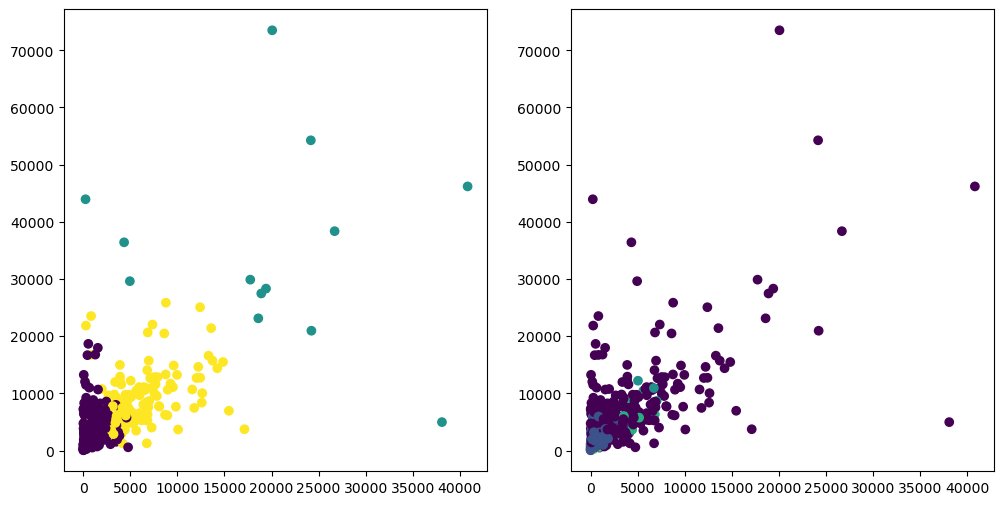

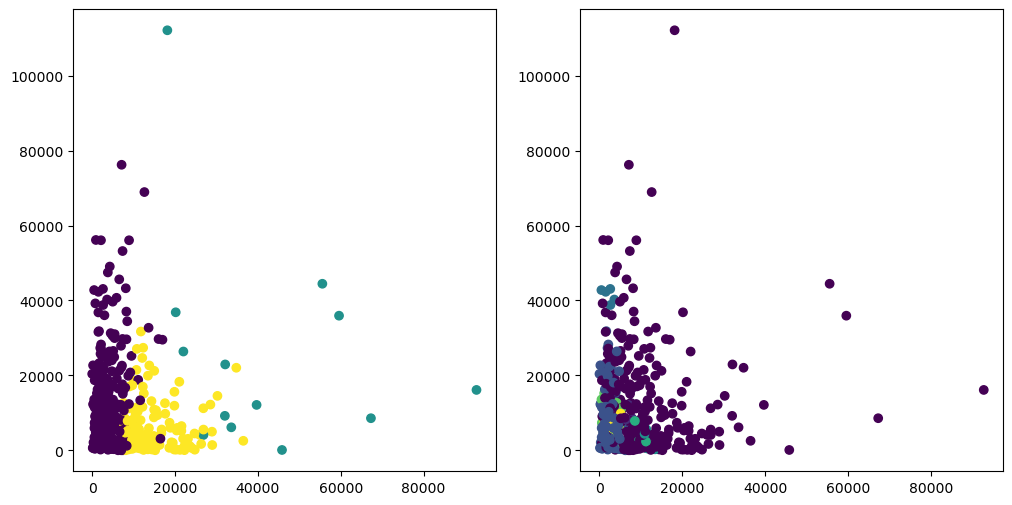

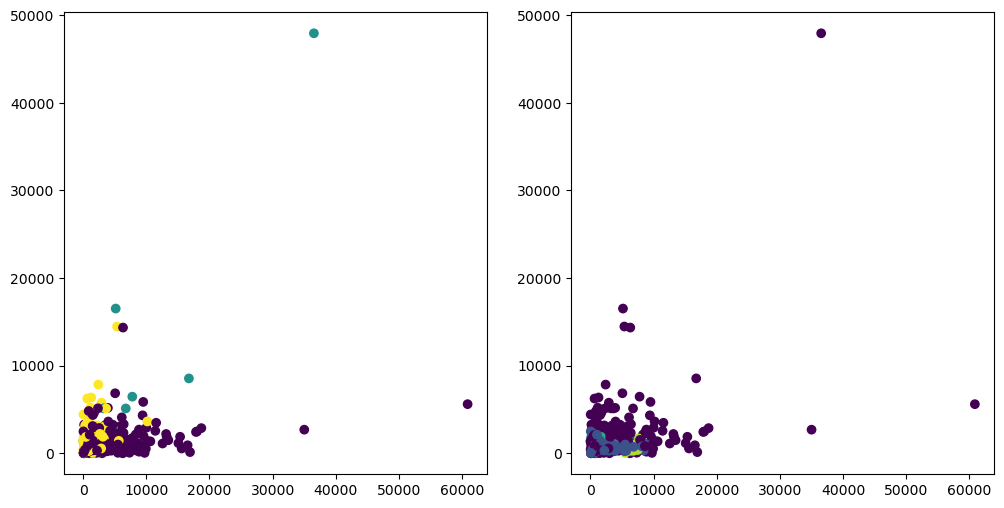

In [162]:
options, charts = plt.subplots(1, 2, figsize=(12, 6))
charts[0].scatter(customers['Detergents_Paper'], customers['Milk'],c=customers['labels'])
charts[1].scatter(customers['Detergents_Paper'], customers['Milk'],c=customers['labels_DBSCAN'])

options, charts = plt.subplots(1, 2, figsize=(12, 6))
charts[0].scatter(customers['Grocery'], customers['Fresh'],c=customers['labels'])
charts[1].scatter(customers['Grocery'], customers['Fresh'],c=customers['labels_DBSCAN'])

options, charts = plt.subplots(1, 2, figsize=(12, 6))
charts[0].scatter(customers['Frozen'], customers['Delicassen'],c=customers['labels'])
charts[1].scatter(customers['Frozen'], customers['Delicassen'],c=customers['labels_DBSCAN'])

# Bonus Challenge 2 - Changing DBSCAN `eps` and `min_samples`

Experiment changing the `eps` and `min_samples` params for DBSCAN. See how the results differ with scatter plot visualization.

In [ ]:
# Your code here

In [ ]:
# Your comment here